In [2]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

In [3]:
device ="cuda" if torch.cuda.is_available() else "cpu"

In [47]:
w = 0.9
b = 0.2

x_start = 0
x_end   = 1
step = 0.01

In [48]:
X = torch.arange(x_start,x_end,step)
Y = w*X + b

In [49]:
X.size() , Y.size()

(torch.Size([100]), torch.Size([100]))

In [50]:
train_split = int(0.8 * len(X)) 
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [121]:
def plot_pred(train_data=X_train,train_labels=y_train,test_data=y_test,test_labels=y_test,pred=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
    print(len(test_data),len(test_labels))
    plt.scatter(test_data,test_labels,c="r",s=4,label="testing data")
    if pred is not None:
        plt.scatter(test_data,pred,c="g",s=4,label="prediction")
    plt.legend(prop={"size": 14});

20 20


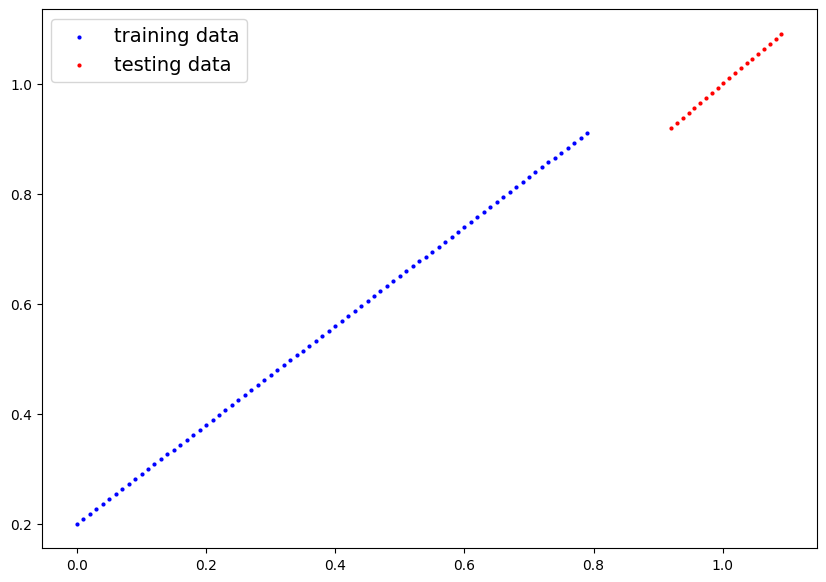

In [122]:
plot_pred()

LR class

In [56]:
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(data = torch.randn(1),requires_grad = True)
        self.bias = nn.Parameter(data = torch.randn(1) , requires_grad = True)

    def forward(self,x : torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [104]:
model = LR()
print(list(model.parameters()) , model.state_dict())
with torch.inference_mode():
    print(model(X_test))

[Parameter containing:
tensor([-0.1384], requires_grad=True), Parameter containing:
tensor([-2.2454], requires_grad=True)] OrderedDict([('weights', tensor([-0.1384])), ('bias', tensor([-2.2454]))])
tensor([-2.3561, -2.3575, -2.3589, -2.3603, -2.3617, -2.3630, -2.3644, -2.3658,
        -2.3672, -2.3686, -2.3700, -2.3713, -2.3727, -2.3741, -2.3755, -2.3769,
        -2.3783, -2.3797, -2.3810, -2.3824])


In [105]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.1)

In [106]:
def train(model,epochs=200):
    train_loss_list = []
    test_loss_list = []
    epoch_list = []
    for epoch in range(epochs):
        model.train()
        y_pred_epoch = model(X_train)
        loss = loss_fn(y_pred_epoch,y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred,y_test)
            epoch_list.append(epoch)
            train_loss_list.append(loss.detach())
            test_loss_list.append(test_loss.detach())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    return train_loss_list , test_loss_list , epoch_list

In [107]:
train_loss , test_loss , epoch = train(model=model)

Epoch: 0 | MAE Train Loss: 2.855553150177002 | MAE Test Loss: 3.2394204139709473 
Epoch: 1 | MAE Train Loss: 2.739950656890869 | MAE Test Loss: 3.104067325592041 
Epoch: 2 | MAE Train Loss: 2.6243484020233154 | MAE Test Loss: 2.968714952468872 
Epoch: 3 | MAE Train Loss: 2.5087456703186035 | MAE Test Loss: 2.833362579345703 
Epoch: 4 | MAE Train Loss: 2.39314341545105 | MAE Test Loss: 2.698009967803955 
Epoch: 5 | MAE Train Loss: 2.277540683746338 | MAE Test Loss: 2.562657356262207 
Epoch: 6 | MAE Train Loss: 2.161938190460205 | MAE Test Loss: 2.427304983139038 
Epoch: 7 | MAE Train Loss: 2.0463356971740723 | MAE Test Loss: 2.291952610015869 
Epoch: 8 | MAE Train Loss: 1.93073308467865 | MAE Test Loss: 2.156599760055542 
Epoch: 9 | MAE Train Loss: 1.815130591392517 | MAE Test Loss: 2.021247148513794 
Epoch: 10 | MAE Train Loss: 1.6995280981063843 | MAE Test Loss: 1.885895013809204 
Epoch: 11 | MAE Train Loss: 1.583925724029541 | MAE Test Loss: 1.7505422830581665 
Epoch: 12 | MAE Train 

In [108]:
def plot_train_test(epoch_count,train_loss_values,test_loss_values):
    plt.plot(epoch_count, train_loss_values, label="Train loss")
    plt.plot(epoch_count, test_loss_values, label="Test loss")
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend();

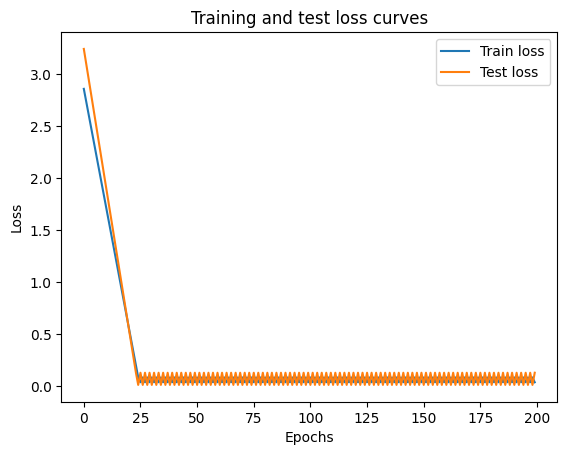

In [109]:
plot_train_test(epoch,train_loss,test_loss)

In [110]:
model.state_dict()

OrderedDict([('weights', tensor([0.8096])), ('bias', tensor([0.1546]))])

In [117]:
preds=model(X_test)

20 20


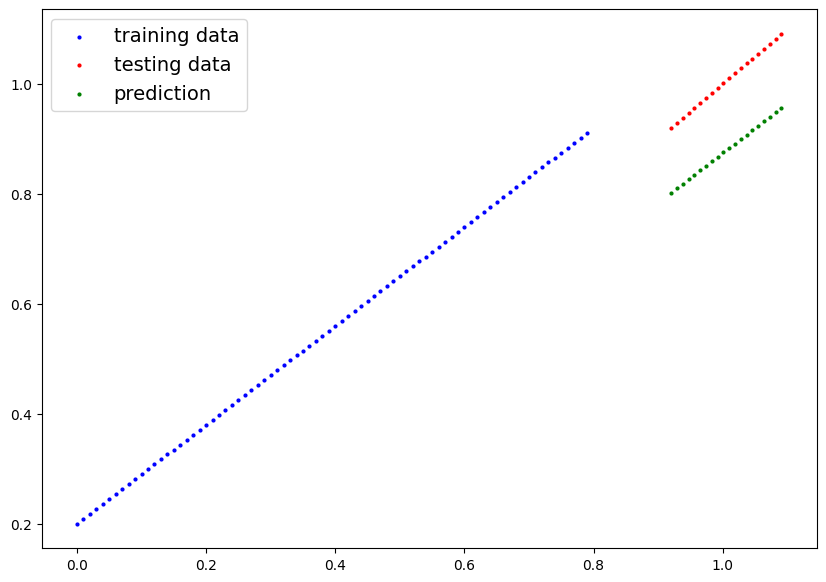

In [124]:
plot_pred(pred = preds.detach().numpy())

In [126]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "1_lr_v0.0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH) 

Saving model to: models\1_lr_v0.0.pth


In [127]:
loaded_model_0 = LR()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [129]:
with torch.inference_mode():
    print(loaded_model_0(X_test))

tensor([0.8023, 0.8104, 0.8185, 0.8266, 0.8347, 0.8428, 0.8509, 0.8589, 0.8670,
        0.8751, 0.8832, 0.8913, 0.8994, 0.9075, 0.9156, 0.9237, 0.9318, 0.9399,
        0.9480, 0.9561])


# Now going through https://docs.pytorch.org/tutorials/beginner/nn_tutorial.html